In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  # For Plotly Express, which is easy-to-use for quick visualizations
import plotly.graph_objects as go 

In [27]:
from functions import concatenate_eurostat_countries, cleaning_eurostat_data_for_viz, clean_countries_numbeo, clean_cities
eurostat_df = concatenate_eurostat_countries()
eurostat_df

,Country,2019,2020,2021,2022,2023
Housing,DE,128.70,138.70,154.80,162.60,148.80
Housing,FR,110.86,116.62,123.98,131.82,131.26
Housing,PT,141.88,154.33,168.84,190.17,205.76
Rental,FR,100.67,101.06,101.92,102.60,104.78
Rental,DE,106.10,107.60,109.00,110.80,113.10
Rental,PT,107.97,110.76,112.76,115.79,121.05
Income,DE,26105.00,29896.00,29106.00,28569.00,30308.00
Income,FR,26210.00,25382.00,26075.00,26419.00,27577.00
Income,PT,11786.00,12696.00,13113.00,13148.00,14368.00


In [28]:
cities = clean_cities()
cities

,Type,City,2019,2020,2021,2022,2023,2024
0,1 bed apartment (rent),Lisbon,894.00,843.29,868.30,1024.46,1259.74,1413.16
1,1 bed apartment (rent),Berlin,905.53,889.28,1036.35,1237.16,1276.16,1186.62
2,1 bed apartment (rent),Paris,1201.81,1222.21,1256.88,1273.16,1333.65,1258.63
3,3 bed apartment (rent),Lisbon,1714.73,1590.85,1628.03,2039.40,2372.69,2642.11
4,3 bed apartment (rent),Berlin,1717.16,1715.00,2038.62,2265.78,1879.18,2253.27
5,3 bed apartment (rent),Paris,2660.91,2752.22,2660.99,2922.45,3013.00,3100.00
6,Buy apartment (per m2 in city center),Lisbon,4342.65,4422.10,4868.25,6097.94,5251.24,5979.57
7,Buy apartment (per m2 in city center),Berlin,6193.00,5989.03,6872.62,8426.66,8147.85,7880.79
8,Buy apartment (per m2 in city center),Paris,11508.28,12195.74,12520.70,12460.36,11844.44,12330.04
9,Av salary (after tax),Lisbon,931.03,1028.22,1034.12,1062.71,1169.53,1235.38


In [29]:
countries = clean_countries_numbeo()
countries

,Type,Country,2019,2020,2021,2022,2023,2024
0,1 bed apartment (rent),PT,727.16,690.16,677.24,802.66,967.85,925.52
1,1 bed apartment (rent),DE,833.65,844.54,850.07,908.01,986.39,886.44
2,1 bed apartment (rent),FR,827.61,848.22,820.06,820.66,862.08,754.73
3,3 bed apartment (rent),PT,1374.06,1196.87,1216.46,1396.72,1734.01,1632.07
4,3 bed apartment (rent),DE,1574.66,1632.03,1675.07,1687.72,1824.63,1259.65
5,3 bed apartment (rent),FR,1656.09,1742.43,1512.53,1651.85,1619.44,1126.74
6,Buy apartment (per m2 in city center),PT,3181.63,3171.13,3284.32,3071.82,3418.93,3473.81
7,Buy apartment (per m2 in city center),DE,5930.62,6226.27,6663.72,6516.65,6782.66,5717.90
8,Buy apartment (per m2 in city center),FR,8306.39,8919.73,6900.37,7471.86,6201.12,5818.93
9,Av salary (after tax),PT,885.56,897.57,923.04,1012.24,1064.03,1037.11


In [31]:
def cleaning_eurostat_data_for_viz(eurostat_df):
    income_df = eurostat_df[eurostat_df.index == 'Income']
    housing_df = eurostat_df[eurostat_df.index == "Housing"]
    rental_df = eurostat_df[eurostat_df.index == "Rental"]

    income_tidy = income_df.melt(id_vars="Country", var_name="Year", value_name="Income")
    housing_tidy = housing_df.melt(id_vars="Country", var_name="Year", value_name="Housing")
    rental_tidy = rental_df.melt(id_vars="Country", var_name="Rental")

    return income_tidy, housing_tidy, rental_tidy, income_df, housing_df, rental_df

In [33]:
income_tidy, housing_tidy, rental_tidy, income_df, housing_df, rental_df = cleaning_eurostat_data_for_viz(eurostat_df)

# Concatenate the DataFrames into one long DataFrame
combined_data = pd.concat([housing_df, rental_df], axis=0)
df_germany = combined_data[combined_data['Country'] == 'DE']
df_germany = df_germany.reset_index().rename(columns={'index': 'Type'})
df_germany_melted = df_germany.melt(id_vars=['Type', 'Country'], var_name='Year', value_name='Value')
df_germany_melted

,Type,Country,Year,Value
0,Housing,DE,2019,128.7
1,Rental,DE,2019,106.1
2,Housing,DE,2020,138.7
3,Rental,DE,2020,107.6
4,Housing,DE,2021,154.8
5,Rental,DE,2021,109.0
6,Housing,DE,2022,162.6
7,Rental,DE,2022,110.8
8,Housing,DE,2023,148.8
9,Rental,DE,2023,113.1


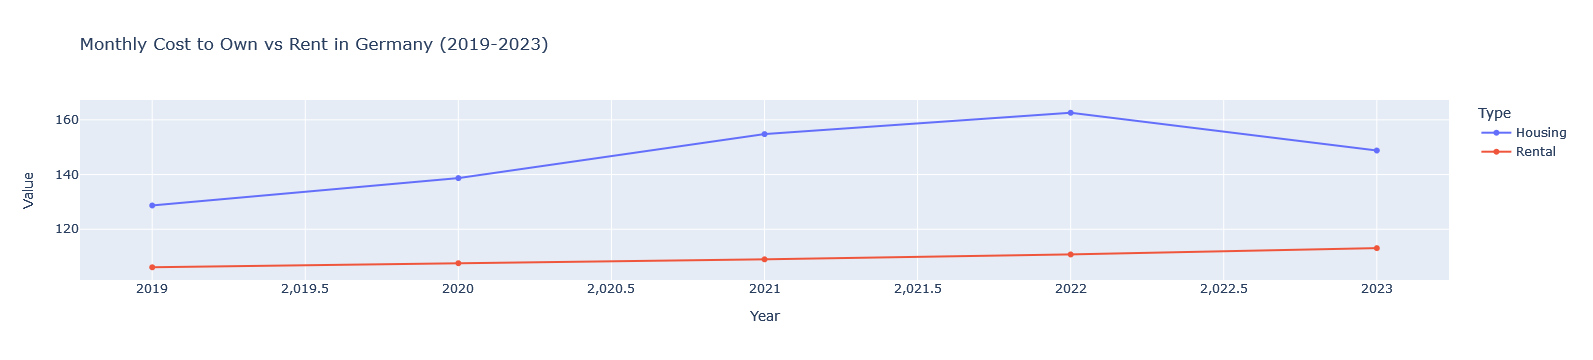

In [38]:
fig = px.line(
    df_germany_melted,
    x='Year',
    y='Value',
    color='Type',  # Different lines for Income and Rental
    markers=True,
    title="Monthly Indexed Cost to Own vs Rent in Germany (2019-2023)"
)

# Show the plot
fig.show()

In [35]:
income_tidy, housing_tidy, rental_tidy, income_df, housing_df, rental_df = cleaning_eurostat_data_for_viz(eurostat_df)

# Concatenate the DataFrames into one long DataFrame
combined_data = pd.concat([housing_df, rental_df], axis=0)
df_portugal = combined_data[combined_data['Country'] == 'PT']
df_portugal = df_portugal.reset_index().rename(columns={'index': 'Type'})
df_portugal_melted = df_portugal.melt(id_vars=['Type', 'Country'], var_name='Year', value_name='Value')
df_portugal_melted

,Type,Country,Year,Value
0,Housing,PT,2019,141.88
1,Rental,PT,2019,107.97
2,Housing,PT,2020,154.33
3,Rental,PT,2020,110.76
4,Housing,PT,2021,168.84
5,Rental,PT,2021,112.76
6,Housing,PT,2022,190.17
7,Rental,PT,2022,115.79
8,Housing,PT,2023,205.76
9,Rental,PT,2023,121.05


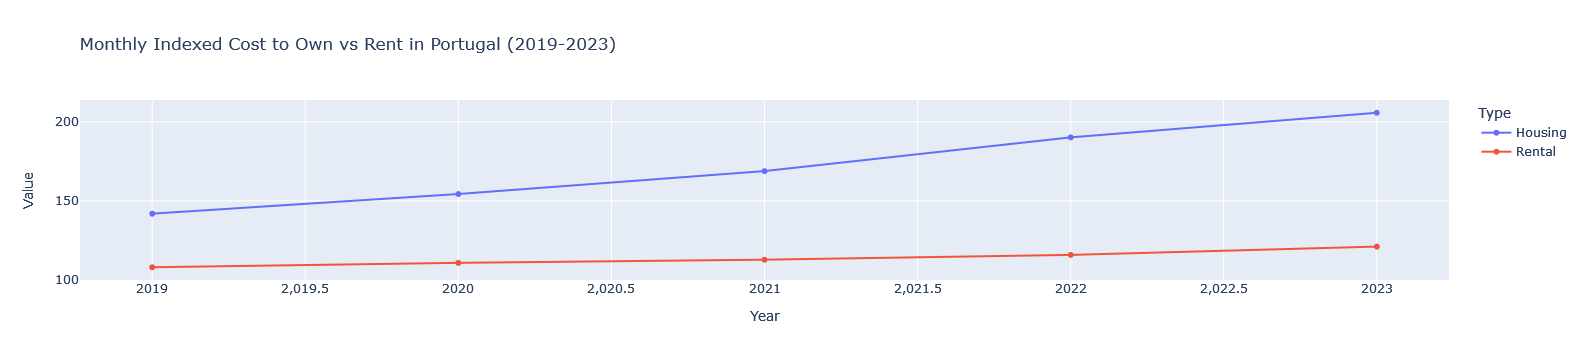

In [41]:
fig = px.line(
    df_portugal_melted,
    x='Year',
    y='Value',
    color='Type',  # Different lines for Income and Rental
    markers=True,
    title="Monthly Indexed Cost to Own vs Rent in Portugal (2019-2023)"
)

# Show the plot
fig.show()

In [42]:
income_tidy, housing_tidy, rental_tidy, income_df, housing_df, rental_df = cleaning_eurostat_data_for_viz(eurostat_df)

# Concatenate the DataFrames into one long DataFrame
combined_data = pd.concat([housing_df, rental_df], axis=0)
df_france = combined_data[combined_data['Country'] == 'FR']
df_france = df_france.reset_index().rename(columns={'index': 'Type'})
df_france_melted = df_france.melt(id_vars=['Type', 'Country'], var_name='Year', value_name='Value')
df_france_melted

,Type,Country,Year,Value
0,Housing,FR,2019,110.86
1,Rental,FR,2019,100.67
2,Housing,FR,2020,116.62
3,Rental,FR,2020,101.06
4,Housing,FR,2021,123.98
5,Rental,FR,2021,101.92
6,Housing,FR,2022,131.82
7,Rental,FR,2022,102.60
8,Housing,FR,2023,131.26
9,Rental,FR,2023,104.78


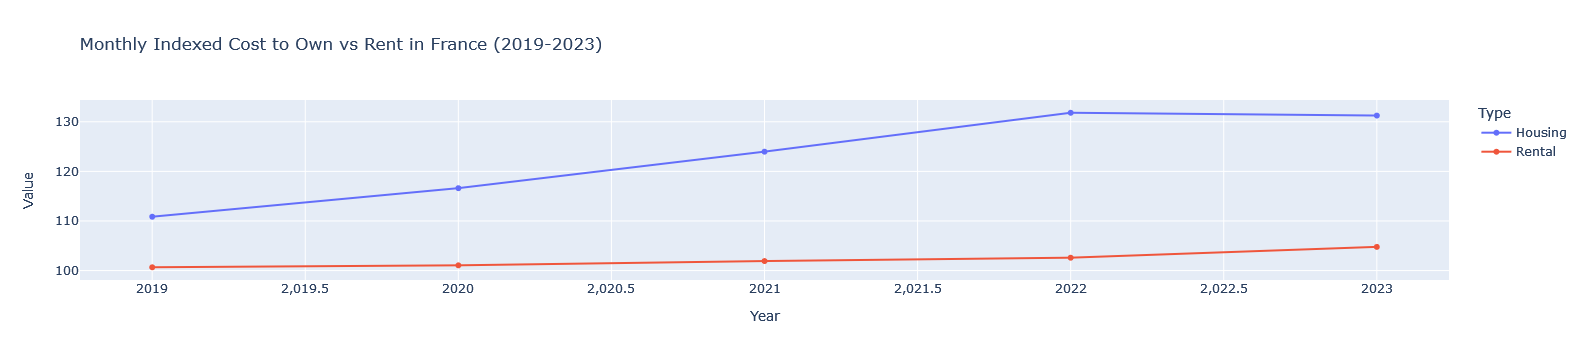

In [43]:
fig = px.line(
    df_france_melted,
    x='Year',
    y='Value',
    color='Type',  # Different lines for Income and Rental
    markers=True,
    title="Monthly Indexed Cost to Own vs Rent in France (2019-2023)"
)

# Show the plot
fig.show()

In [ ]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=income_tidy, x="Year", y="Income", hue="Country", marker="o")
plt.title("Income Trends for Portugal (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Income (€)")
plt.show()

In [ ]:
df_lisbon = cities[cities["City"] == "Lisbon"]
df_lisbon

In [ ]:
df_rent_salary = df_lisbon[df_lisbon['Type'].isin(['1 bed apartment (rent)', '3 bed apartment (rent)', 'Av salary (after tax)'])]
df_rent_salary_melted = df_rent_salary.melt(id_vars=["Type", "City"], var_name="Year", value_name="Value")
fig = px.line(
    df_rent_salary_melted,
    x="Year",              # x-axis: Year
    y="Value",             # y-axis: Value
    color="Type",          # Different lines for different Types (rent and salary)
    markers=True,          # Add markers at each data point
    title="Comparison between Rent and Salary in Lisbon (2019-2024)", # Title of the chart
    labels={"Value": "Amount (€)", "Year": "Year", "Type": "Type of Data"} # Axis labels
)

# Show the plot
fig.show()

In [ ]:
cities_one_bed_apt = cities[cities['Type'] == "1 bed apartment (rent)"]
cities_one_bed_apt_melted = cities_one_bed_apt.melt(id_vars=["Type", "City"], var_name="Year", value_name="Value")
cities_one_bed_apt_melted

In [ ]:
fig = px.line(
    cities_one_bed_apt_melted, 
    x="Year", 
    y="Value",
    color="City",       
    line_group="City",  
    facet_col="Type",      
    markers=True 
)

fig.show()

In [ ]:
cities_salaries = cities[cities['Type'] == "Av salary (after tax)"]
cities_salaries_melted = cities_salaries.melt(id_vars=["Type", "City"], var_name="Year", value_name="Value")
cities_salaries_melted

In [ ]:
fig = px.line(
    cities_salaries_melted, 
    x="Year", 
    y="Value",
    color="City",       
    line_group="City",  
    facet_col="Type",      
    markers=True
    title="Average salaries in Lisbon, Berlin and Paris (2019-2024)", # Title of the chart
    labels={"Value": "Amount (€)", "Year": "Year", "Type": "Type of Data"} # Axis labels
)

fig.show()